In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

class GradientBoostingRegressor:
    def __init__(self, n_estimators = 100, learning_rate = 0.1, max_depth = 3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth 
        self.trees = []
        self.init_val = None # initial prediction

    def fit(self, X, y):
        self.init_val = np.mean(y)
        pred = np.full(y.shape, self.init_val)

        # weak trees
        for i in range(self.n_estimators):
            residuals = y - pred
            tree = DecisionTreeRegressor(max_depth = self.max_depth)
            tree.fit(X, residuals)
            self.trees.append(tree)

            # update
            pred += self.learning_rate * tree.predict(X)

    def predict(self, X):
        pred = np.full((X.shape[0], ), self.init_val)

        for tree in self.trees:
            pred += self.learning_rate * tree.predict(X)

        return pred

In [2]:
# Testing
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples = 200, n_features = 1, noise = 10, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train)

pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, pred)

print('MSE of Gradient Boosting Regressor:', mse)

MSE of Gradient Boosting Regressor: 94.80815073870194


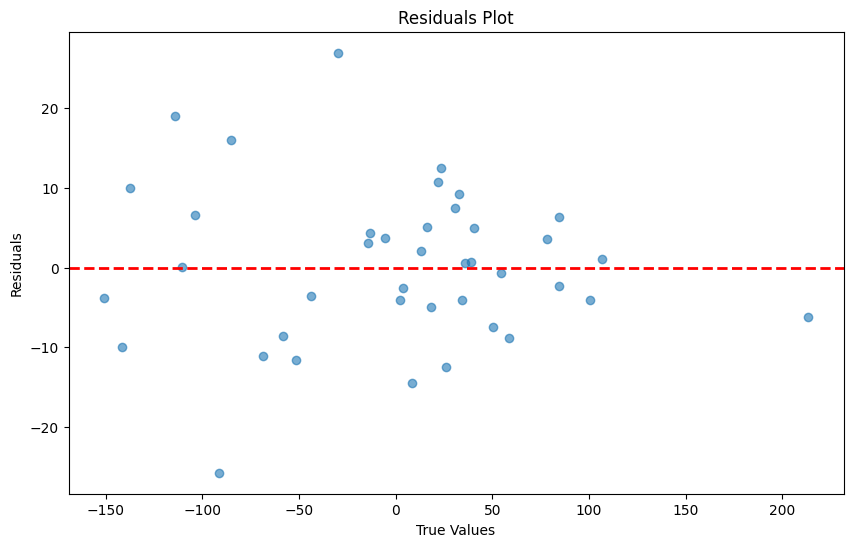

In [3]:
import matplotlib.pyplot as plt
residuals = y_test - pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

In [4]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [6]:
from sklearn.tree import export_graphviz
import graphviz

tree = regressor.trees[0]  
dot_data = export_graphviz(tree, out_file=None, filled=True)
graph = graphviz.Source(dot_data)
graph.render("tree_visualization") 
graph.view()

'tree_visualization.pdf'